# Authoring a StoryMap with the Python API

## Import Libraries and Connect to your GIS

In [37]:
from arcgis.gis import GIS
from arcgis.apps.storymap import StoryMap, Image, Text, Button, Map, Themes

gis = GIS(profile="your_online_profile")
gis

GIS @ https://geosaurus.maps.arcgis.com version:9.4

##### The content folder that holds the media we will be using

In [38]:
content = "C:\ipython_workfolder\Content"

## Create a New Story Map

In [39]:
story = StoryMap()
story

{"root": "n-852b4b", "nodes": {"n-aTn8ak": {"type": "storycover", "data": {"type": "minimal", "title": "", "summary": "", "byline": "naubry_geosaurus", "titlePanelPosition": "start"}}, "n-1AItUD": {"type": "navigation", "data": {"links": []}, "config": {"isHidden": true}}, "n-cOeTah": {"type": "credits"}, "n-852b4b": {"type": "story", "data": {"storyTheme": "r-vlc4Kp"}, "config": {"coverDate": "first-published", "storyLocale": "en-US"}, "children": ["n-aTn8ak", "n-1AItUD", "n-cOeTah"]}}, "resources": {"r-vlc4Kp": {"type": "story-theme", "data": {"themeId": "summit", "themeBaseVariableOverrides": {}}}}}

## Understanding Nodes

Every story is comprised of nodes. These nodes depict the elements in the story and it is by accessing these nodes that we will edit our story.  
When you create new content, a unique node_id is assigned to the content.
  
  
When a new story is created in the Python API there will always be three nodes: Storycover, navigation, and credits.

In [40]:
story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-cOeTah': 'credits'}]

## Editing Storycover

In [41]:
story_cover=Image(content+"\hike.jpg")

In [42]:
story.cover(title="My DevSummit Story", summary="This storymap is created to show basic functionalities at DevSummit 2022", by_line="Python API Team", image=story_cover)

{'type': 'storycover',
 'data': {'type': 'minimal',
  'title': 'My DevSummit Story',
  'summary': 'This storymap is created to show basic functionalities at DevSummit 2022',
  'byline': 'Python API Team',
  'titlePanelPosition': 'start'},
 'children': ['n-fc4e11']}

## Setting a Theme

My story has great content, but a theme will make everything more appealing. 

Themes can be found in the Themes Class or you can use a custom theme.

In [44]:
[theme.value for theme in Themes]

['summit', 'obsidian', 'ridgeline', 'mesa', 'tidal', 'slate']

<Item title:"DevSummit Theme" type:StoryMap Theme owner:naubry_geosaurus>
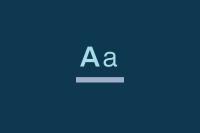

In [45]:
my_theme = gis.content.search("DevSummit Theme")[0]
my_theme

In [46]:
story.theme(theme=my_theme.id)

In [47]:
story.save("My DevSummit Story")

<Item title:"My DevSummit Story" type:StoryMap owner:naubry_geosaurus>

## Adding Content

A storymap holds different types of content, the ones supported by the Python API are:
* Image
* Video
* Audio
* Embed
* WebMap
* Text
* Button
* Gallery
* Timeline
* Swipe
* Sidecar

### Adding an Image and looking at the properties

To add an image to a story we first start by creating an instance of the Image class with either the image path or a url.  
When we add the image to the story, what is returned is the image's node_id for the story.

In [48]:
img = Image(content+"\water.jpg")

In [49]:
# Nothing is returned because it does not yet belong to a story
img.properties

In [50]:
img_node = story.add(img, caption="My first image")
img_node

'n-03b53e'

In [51]:
story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-03b53e': <arcgis.apps.storymap.story_content.Image at 0x1da3e6cccc8>},
 {'n-cOeTah': 'credits'}]

### The get method

We can manipulate the `img` now and continue working with it OR if you need to grab it again then use the get method with the node_id

In [52]:
my_image = story.get(img_node)
my_image

In [59]:
my_image.properties

{'node_dict': {'type': 'image',
  'data': {'image': 'r-820659',
   'caption': 'A dog with beautiful eyes',
   'alt': ''},
  'config': {'size': ''}},
 'resource_dict': {'type': 'image',
  'data': {'resourceId': 'pup.jpg',
   'provider': 'item-resource',
   'height': 2400,
   'width': 3604}}}

### Edit an existing image

Now that the image exists in this story, we can edit using some properties.

In [54]:
my_image.image

'water.jpg'

In [55]:
my_image.image = content+"\pup.jpg"

In [56]:
my_image.image

'pup.jpg'

In [58]:
my_image.caption = "A dog with beautiful eyes"

### Adding a Map

Begin by creating an instance of the Map class that is found inside Story Content.  
This Map instance can be created from a WebMap item or by simply taking the WebMap item id.

In [60]:
infomap = Map("01fa55f171eb48a7ac9c460c0339e6c1")

In [61]:
story.add(infomap)

'n-3b4ecb'

### View the properties

In [62]:
infomap.properties

{'node_dict': {'type': 'webmap',
  'data': {'map': 'r-01fa55f171eb48a7ac9c460c0339e6c1',
   'caption': '',
   'alt': '',
   'extent': {'xmin': -180, 'ymin': -82.5861, 'xmax': 180, 'ymax': 88.0753},
   'center': {},
   'zoom': 2,
   'viewpoint': {}},
  'config': {'size': None}},
 'resource_dict': {'type': 'webmap',
  'data': {'extent': {'xmin': -180,
    'ymin': -82.5861,
    'xmax': 180,
    'ymax': 88.0753},
   'center': {},
   'zoom': 2,
   'mapLayers': [{'id': 'GLDAS_Precipitation_3165',
     'title': 'GLDAS Precipitation 2000 - Present',
     'visible': True}],
   'viewpoint': {},
   'itemId': '01fa55f171eb48a7ac9c460c0339e6c1',
   'itemType': 'Web Map',
   'type': 'default'}}}

<Item title:"Monthly Precipitation" type:Web Map owner:esri_observations>
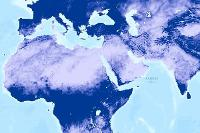

In [63]:
infomap.map

In [64]:
story.save()

<Item title:"My DevSummit Story" type:StoryMap owner:naubry_geosaurus>